In [1]:
'''
社会财富的分配问题：
    游戏规则:
        一个房间里有100个人，每个人都有100元钱，他们在玩一个游戏。每轮游戏中，每个人都要拿出一元钱随机给另一个人，最后这100人的财富分配是怎么样的？
    研究问题：
        1.财富分配模型
            * 模型假设：
                -- 每个人的初始基金100元
                -- 从18岁玩到65岁，每天玩一次，简化运算按照一共玩 17000轮
                -- 每天拿出一元钱，并且随机分配给另一个人
                -- 当某人的财富值降到0元时，他在该轮无需拿出1元钱给别人，但仍有机会得到别人给的钱
            * 要求：
                -- 构建模型模拟(这里需要跑17000轮)
                -- 绘制柱状图，查看该轮财富情况
                    ** 横轴标签代表一个玩家的编号，柱子的高度变动反映该玩家财富值的变化
                    ** 制图分别有两个情况：不排序绘制、每轮按照财富值排序绘制
                    ** 前100轮，按照每10轮绘制一次柱状图，查看财富变化情况
                    ** 100轮——1000轮，按照每100轮绘制一次柱状图，查看财富变化情况
                    ** 1000轮——17000轮，按照每400轮绘制一次柱状图，查看财富变化情况
                -- 查看最后财富分配的数据是什么分布？
                -- 最富有的人相比于初始的财富，翻了多少倍？
                -- 10%的人掌握的多少财富？30%的人掌握的多少财富？又有百分之多少的人财富缩水到100元以下了？
            * 提示：
                -- 首先 模拟第一轮游戏的分配，不考虑某人财富降到0的元的情况
                -- 其次，仍然模拟第一轮游戏分配，但考虑某人的财富值降到0元时的情况
                -- 构建模型
                -- 运行模型，按照 100  1000  17000 的梯次运行
                -- 制图
'''

'\n社会财富的分配问题：\n    游戏规则:\n        一个房间里有100个人，每个人都有100元钱，他们在玩一个游戏。每轮游戏中，每个人都要拿出一元钱随机给另一个人，最后这100人的财富分配是怎么样的？\n    研究问题：\n        1.财富分配模型\n            * 模型假设：\n                -- 每个人的初始基金100元\n                -- 从18岁玩到65岁，每天玩一次，简化运算按照一共玩 17000轮\n                -- 每天拿出一元钱，并且随机分配给另一个人\n                -- 当某人的财富值降到0元时，他在该轮无需拿出1元钱给别人，但仍有机会得到别人给的钱\n            * 要求：\n                -- 构建模型模拟(这里需要跑17000轮)\n                -- 绘制柱状图，查看该轮财富情况\n                    ** 横轴标签代表一个玩家的编号，柱子的高度变动反映该玩家财富值的变化\n                    ** 制图分别有两个情况：不排序绘制、每轮按照财富值排序绘制\n                    ** 前100轮，按照每10轮绘制一次柱状图，查看财富变化情况\n                    ** 100轮——1000轮，按照每100轮绘制一次柱状图，查看财富变化情况\n                    ** 1000轮——17000轮，按照每400轮绘制一次柱状图，查看财富变化情况\n                -- 查看最后财富分配的数据是什么分布？\n                -- 最富有的人相比于初始的财富，翻了多少倍？\n                -- 10%的人掌握的多少财富？30%的人掌握的多少财富？又有百分之多少的人财富缩水到100元以下了？\n'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time
# 不发出警告
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 第一轮游戏分配模拟，不考虑财富值为0的情况
# 设置基本参数
person_n = [x for x in range(1,101)]  # 设置人员编号
fortune = pd.DataFrame([100 for i in range(100)],index = person_n) # 为每个人员设置初始财富 均为100元
fortune.index.name = 'id'

round_r1 = pd.DataFrame({'pre_round':fortune[0],'lost':1}) # 第一轮游戏 每一个人都需要拿出 1块钱进行交换
choice_r1  = pd.Series(np.random.choice(person_n,100)) # 在100 个人中随机选取100位(可以重复)
gain_r1 = pd.DataFrame({'gain':choice_r1.value_counts()}) # 统计第一轮中收入增加的人员 以及 收入了多少
round_r1 = round_r1.join(gain_r1) # 合并两个 df  默认以人员编号来合并
round_r1.fillna(0,inplace=True)  # 处理空值
fortune[1] = round_r1['pre_round'] - round_r1['lost'] + round_r1['gain']

fortune.head()

# print('finished!')

,0,1
id,,
1,100,99.0
2,100,99.0
3,100,101.0
4,100,99.0
5,100,100.0
6,100,100.0
7,100,101.0
8,100,99.0
9,100,100.0


In [5]:
# 第一轮游戏分配，考虑财富值为0 的情况(当为0 时 不分配财富)
# 设置基本参数
person_n = [x for x in range(1,101)]  # 设置人员编号
fortune = pd.DataFrame([100 for i in range(100)],index = person_n) # 为每个人员设置初始财富 均为100元
fortune.index.name = 'id'

round_r1 = pd.DataFrame({'pre_round':fortune[0],'lost':0}) # 初始值为0 这里需要做一个判断
round_r1['lost'][round_r1['pre_round'] > 0] = 1 # 只要拥有的财富没有为0 就可以继续 拿出1元钱进行游戏
round_players = round_r1[round_r1['pre_round'] > 0] # 筛选出次轮的玩家

# 其余部分和 上面一样
choice_r1  = pd.Series(np.random.choice(person_n,100)) # 在100 个人中随机选取100位(可以重复)
gain_r1 = pd.DataFrame({'gain':choice_r1.value_counts()}) # 统计第一轮中收入增加的人员 以及 收入了多少
round_r1 = round_r1.join(gain_r1) # 合并两个 df  默认以人员编号来合并
round_r1.fillna(0,inplace=True)  # 处理空值
fortune[1] = round_r1['pre_round'] - round_r1['lost'] + round_r1['gain']

fortune.head()

# print('finished!')

,0,1
id,,
1,100,99.0
2,100,102.0
3,100,100.0
4,100,99.0
5,100,99.0


已经完成1轮
已经完成2轮
已经完成3轮
已经完成4轮
已经完成5轮
已经完成6轮
已经完成7轮
已经完成8轮
已经完成9轮
已经完成10轮
已经完成11轮
已经完成12轮
已经完成13轮
已经完成14轮
已经完成15轮
已经完成16轮
已经完成17轮
已经完成18轮
已经完成19轮
已经完成20轮
已经完成21轮
已经完成22轮
已经完成23轮
已经完成24轮
已经完成25轮
已经完成26轮
已经完成27轮
已经完成28轮
已经完成29轮
已经完成30轮
已经完成31轮
已经完成32轮
已经完成33轮
已经完成34轮
已经完成35轮
已经完成36轮
已经完成37轮
已经完成38轮
已经完成39轮
已经完成40轮
已经完成41轮
已经完成42轮
已经完成43轮
已经完成44轮
已经完成45轮
已经完成46轮
已经完成47轮
已经完成48轮
已经完成49轮
已经完成50轮
已经完成51轮
已经完成52轮
已经完成53轮
已经完成54轮
已经完成55轮
已经完成56轮
已经完成57轮
已经完成58轮
已经完成59轮
已经完成60轮
已经完成61轮
已经完成62轮
已经完成63轮
已经完成64轮
已经完成65轮
已经完成66轮
已经完成67轮
已经完成68轮
已经完成69轮
已经完成70轮
已经完成71轮
已经完成72轮
已经完成73轮
已经完成74轮
已经完成75轮
已经完成76轮
已经完成77轮
已经完成78轮
已经完成79轮
已经完成80轮
已经完成81轮
已经完成82轮
已经完成83轮
已经完成84轮
已经完成85轮
已经完成86轮
已经完成87轮
已经完成88轮
已经完成89轮
已经完成90轮
已经完成91轮
已经完成92轮
已经完成93轮
已经完成94轮
已经完成95轮
已经完成96轮
已经完成97轮
已经完成98轮
已经完成99轮
已经完成100轮
已经完成101轮
已经完成102轮
已经完成103轮
已经完成104轮
已经完成105轮
已经完成106轮
已经完成107轮
已经完成108轮
已经完成109轮
已经完成110轮
已经完成111轮
已经完成112轮
已经完成113轮
已经完成114轮
已经完成115轮
已经完成116轮
已经完成117轮
已经完成118轮
已经完成119轮
已经完成120轮
已经完成121轮
已经完成122轮
已经完成123轮
已

已经完成928轮
已经完成929轮
已经完成930轮
已经完成931轮
已经完成932轮
已经完成933轮
已经完成934轮
已经完成935轮
已经完成936轮
已经完成937轮
已经完成938轮
已经完成939轮
已经完成940轮
已经完成941轮
已经完成942轮
已经完成943轮
已经完成944轮
已经完成945轮
已经完成946轮
已经完成947轮
已经完成948轮
已经完成949轮
已经完成950轮
已经完成951轮
已经完成952轮
已经完成953轮
已经完成954轮
已经完成955轮
已经完成956轮
已经完成957轮
已经完成958轮
已经完成959轮
已经完成960轮
已经完成961轮
已经完成962轮
已经完成963轮
已经完成964轮
已经完成965轮
已经完成966轮
已经完成967轮
已经完成968轮
已经完成969轮
已经完成970轮
已经完成971轮
已经完成972轮
已经完成973轮
已经完成974轮
已经完成975轮
已经完成976轮
已经完成977轮
已经完成978轮
已经完成979轮
已经完成980轮
已经完成981轮
已经完成982轮
已经完成983轮
已经完成984轮
已经完成985轮
已经完成986轮
已经完成987轮
已经完成988轮
已经完成989轮
已经完成990轮
已经完成991轮
已经完成992轮
已经完成993轮
已经完成994轮
已经完成995轮
已经完成996轮
已经完成997轮
已经完成998轮
已经完成999轮
已经完成1000轮
模型总共用时4.009秒


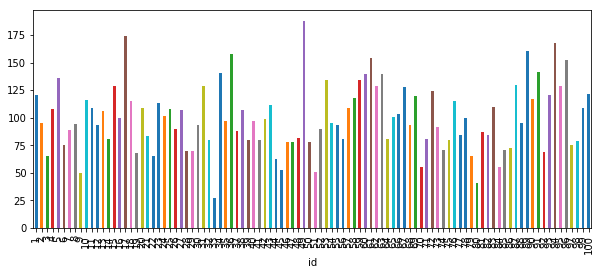

In [54]:
# 综上所述，建立模型

def game1(data,roundi):
    if len(data[data[roundi - 1] == 0]) > 0:
        # 当数据中包含财富值为0 的玩家时
        round_i = pd.DataFrame({'pre_round':data[roundi - 1],'lost':0})
        con = round_i['pre_round'] > 0
        round_i['lost'][con] = 1   # 筛选出参与玩家中 还可以继续支付 1元 的玩家
        round_players_i = round_i[con]
        choice_i = pd.Series(np.random.choice(preson_n,len(round_players_i)))
        gain_i = pd.DataFrame({'gain':choice_i.value_counts()})
        round_i = round_i.join(gain_i)
        round_i.fillna(0,inplace=True)
        return round_i['pre_round'] - round_i['lost'] + round_i['gain']   # 合并数据 并且返回该轮的财富分配结果
    else:
        round_i = pd.DataFrame({'pre_round':data[roundi - 1],'lost':1})
        choice_i = pd.Series(np.random.choice(person_n,100))
        gain_i = pd.DataFrame({'gain':choice_i.value_counts()})
        round_i = round_i.join(gain_i)
        round_i.fillna(0,inplace=True)
        return round_i['pre_round'] - round_i['lost'] + round_i['gain']
    
    
# 设置基本参数
person_n = [x for x in range(1,101)]  # 设置人员编号
fortune = pd.DataFrame([100 for i in range(100)],index = person_n) # 为每个人员设置初始财富 均为100元
fortune.index.name = 'id'

# 运行模型 并记录 运行时间
starttime = time.time()
for roundi in range(1,1001):
    fortune[roundi] = game1(fortune,roundi)
    print('已经完成%i轮' % roundi)  
game1_result = fortune.T # 行 列 互转
endtime = time.time()

print('模型总共用时%.3f秒'% (endtime - starttime))

fortune[1000].plot(kind='bar',figsize=(10,4))

成功绘制第0轮结果柱状图
成功绘制第100轮结果柱状图
成功绘制第200轮结果柱状图
成功绘制第300轮结果柱状图
成功绘制第400轮结果柱状图
成功绘制第500轮结果柱状图
成功绘制第600轮结果柱状图
成功绘制第700轮结果柱状图
成功绘制第800轮结果柱状图
成功绘制第900轮结果柱状图
成功绘制第1000轮结果柱状图


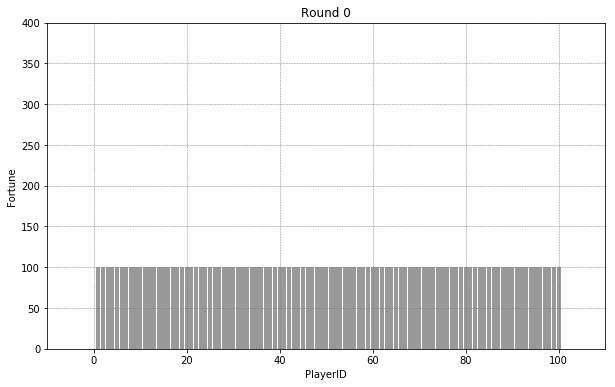

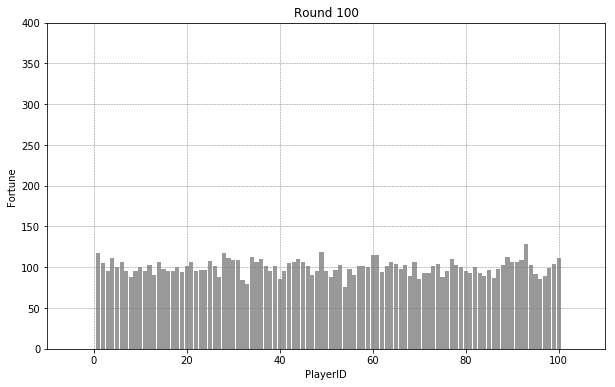

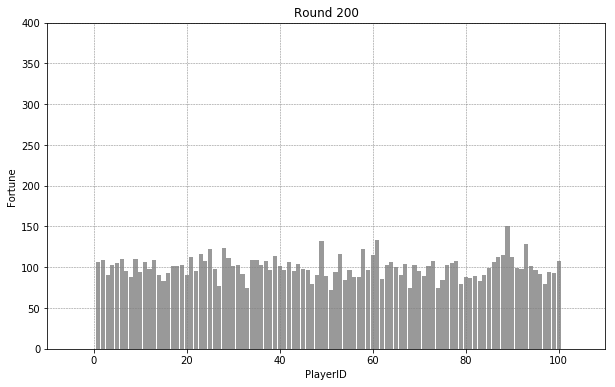

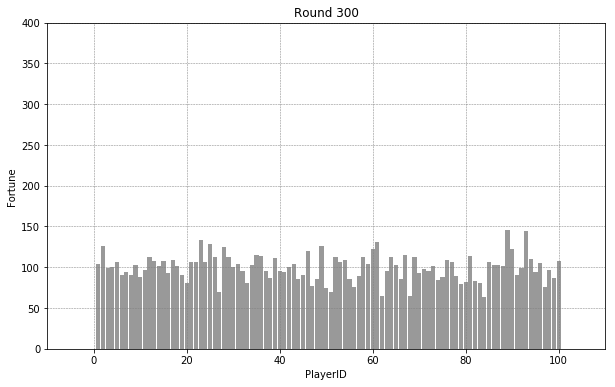

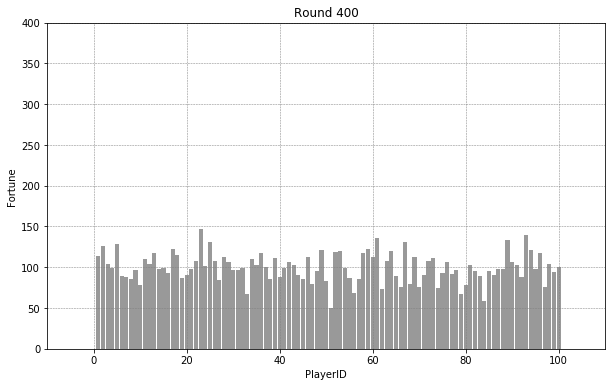

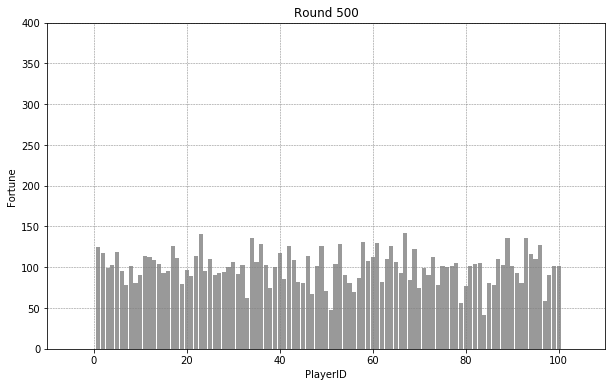

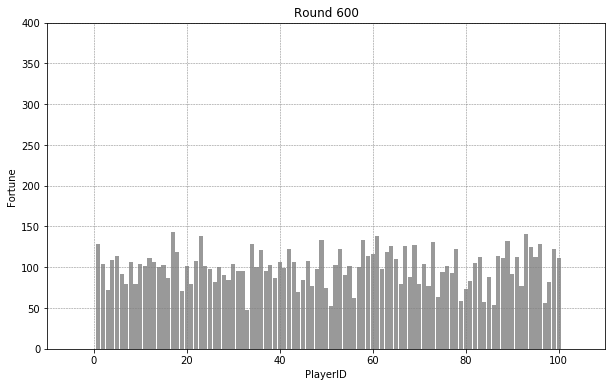

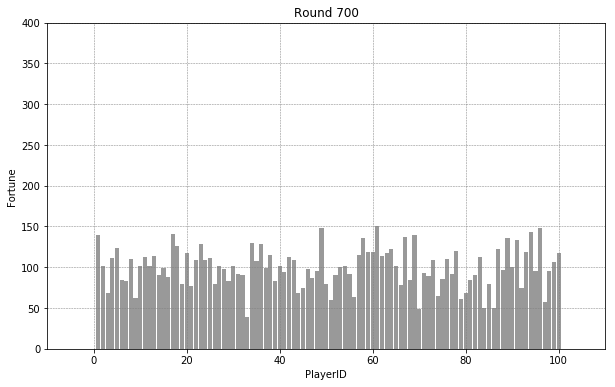

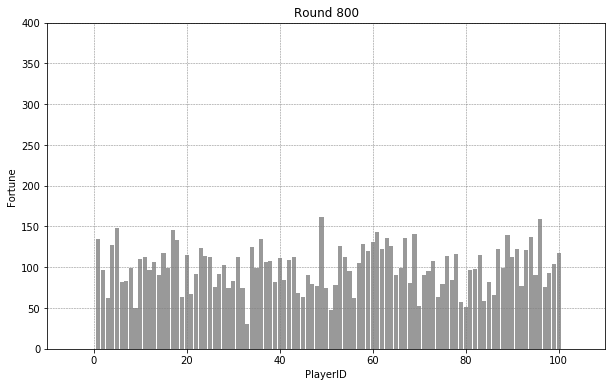

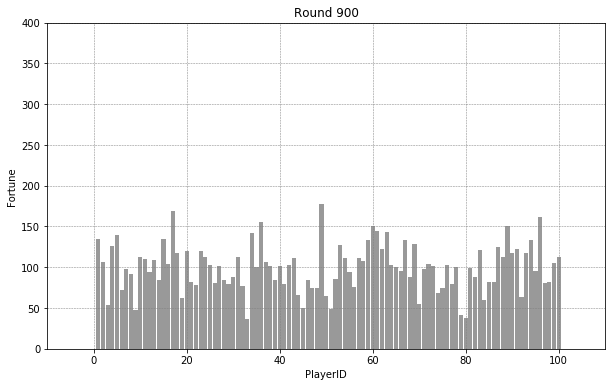

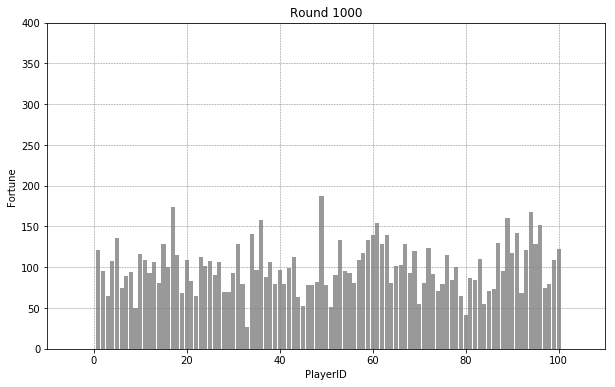

In [55]:
# 绘制柱状图_不排序
os.chdir(r'F:\社会财富分配图\ND1')

def graph1(data,start,end,length):
    for n in list(range(start,end,length)):
        datai = data.iloc[n]
        plt.figure(figsize=(10,6))
        plt.bar(datai.index,datai.values,color='gray',alpha=0.8,width=0.9)
        plt.ylim([0,400])
        plt.xlim([-10,110])
        plt.title('Round %d' %n)
        plt.xlabel('PlayerID')
        plt.ylabel('Fortune')
        plt.grid(color='gray',linestyle='--',linewidth=0.5)
        plt.savefig('graph1_round_%d.png' % n,dpi=200)
        print('成功绘制第%d轮结果柱状图' %n)

graph1(game1_result,0,1001,100)


In [ ]:
# 绘制柱状图_排序
os.chdir(r'F:\社会财富分配图\ND2')

def graph2(data,start,end,length):
    for n in list(range(start,end,length)):
        datai = data.iloc[n].sort_values().reset_index()[n]
        plt.figure(figsize=(10,6))
        plt.bar(datai.index,datai.values,color='gray',alpha=0.8,width=0.9)
        plt.ylim([0,400])
        plt.xlim([-10,110])
        plt.title('Round %d' %n)
        plt.xlabel('PlayerID')
        plt.ylabel('Fortune')
        plt.grid(color='gray',linestyle='--',linewidth=0.5)
        plt.savefig('graph2_round_%d.png' % n,dpi=200)
        print('成功绘制第%d轮结果柱状图' %n)

graph2(game1_result,0,100,10)

'''
    结论： 
        * 最后一轮中，最富有的人财富值为365，相比于初始财富，翻了3.65倍；
        * 10%的人掌握了28%的财富，20%的人掌握了51%的财富；
        * 60%的人财富缩水至100元以下；
'''

round_17000_1 = pd.DataFrame({'money':fortune.iloc[17000]}).sort_values(by='money',ascending=False)
round_17000_1['fortune_pre'] = round_17000_1['money']/round_17000_1['money'].sum()
round_17000_1['fortune_cumsum'] = round_17000_1['fortune_pre'].cumsum()

In [ ]:
'''
2. 允许在借贷的情况下研究一下问题(允许借贷意味着 可以找亲友、银行、投资人借贷 资产为负时，仍可以参加游戏)
    * 要求：
        -- 构建模型模拟，再次模拟财富分配情况
            ** 最富有的人相比初始财富，翻了多少倍？
            ** 10%的人掌握了多少财富？30%的人掌握了多少财富？百分之多少的人财富缩水至100元以下？
        -- 绘制柱状图，查看该轮财富情况
            ** 横轴坐标代表一个玩家的编号，柱子的高低变动反映该玩家财富值的变化
            ** 这里只需要每轮按照财富值排序绘制
            ** 前100轮，每10轮绘制一次柱状图，查看财富变化情况
            ** 100至1000轮，按照每次100轮绘制一次柱状图，查看财富变化情况
            ** 1000至17000轮，按照每400轮绘制一次柱状图，查看财富变化情况
        -- 游戏次数与财富分布的标准差的情况，绘图来表示
            ** 这里用允许借贷的情况来模拟结果
            ** 横坐标为游戏次数(17000次)，纵坐标为财富分配标准差
            ** 绘制折线图
        -- 玩家从18岁开始，在经过17年后未35岁，这个期间共进行游戏6200次左右。此刻查看财富情况，将财富值为负标记为 破产，通过图表研究
            ** 该类玩家在今后的游戏中能否逆袭成功(财富值从负为正，就被认为成功逆袭)
            ** 这里绘制柱状图 6200 至 17000轮 按照每500轮绘制柱状图
    * 提示：
        -- 该模型只需要将初始模型中，“财富小于零时无需拿钱给别人”的条件删掉即可
        -- 最后绘制柱状图时，需要将负债的玩家标红，这里可以通过截取dataframe之后，给与color字段来设置颜色
'''

In [56]:
# 创建函数(与第一个模型相似，而且更为简单)
def game2(data,roundi):
    round_i = pd.DataFrame({'pre_round':data[roundi-1],'lost':1})
    choice_i = pd.Series(np.random.choice(person_n,100))
    gain_i = pd.DataFrame({'gain':choice_i.value_counts()})
    round_i = round_i.join(gain_i)
    round_i.fillna(0,inplace=True)
    return round_i['pre_round'] - round_i['lost'] + round_i['gain']

# 设置基本参数
person_n = [x for x in range(1,101)]  # 设置人员编号
fortune = pd.DataFrame([100 for i in range(100)],index = person_n) # 为每个人员设置初始财富 均为100元
fortune.index.name = 'id'

# 运行模型 并记录 运行时间
starttime = time.time()
for roundi in range(1,17001):
    fortune[roundi] = game2(fortune,roundi)
    print('已经完成%i轮' % roundi)
game2_result = fortune.T
endtime = time.time()
print('模型总共用时%.3f秒'% (endtime - starttime))

已经完成1轮
已经完成2轮
已经完成3轮
已经完成4轮
已经完成5轮
已经完成6轮
已经完成7轮
已经完成8轮
已经完成9轮
已经完成10轮
已经完成11轮
已经完成12轮
已经完成13轮
已经完成14轮
已经完成15轮
已经完成16轮
已经完成17轮
已经完成18轮
已经完成19轮
已经完成20轮
已经完成21轮
已经完成22轮
已经完成23轮
已经完成24轮
已经完成25轮
已经完成26轮
已经完成27轮
已经完成28轮
已经完成29轮
已经完成30轮
已经完成31轮
已经完成32轮
已经完成33轮
已经完成34轮
已经完成35轮
已经完成36轮
已经完成37轮
已经完成38轮
已经完成39轮
已经完成40轮
已经完成41轮
已经完成42轮
已经完成43轮
已经完成44轮
已经完成45轮
已经完成46轮
已经完成47轮
已经完成48轮
已经完成49轮
已经完成50轮
已经完成51轮
已经完成52轮
已经完成53轮
已经完成54轮
已经完成55轮
已经完成56轮
已经完成57轮
已经完成58轮
已经完成59轮
已经完成60轮
已经完成61轮
已经完成62轮
已经完成63轮
已经完成64轮
已经完成65轮
已经完成66轮
已经完成67轮
已经完成68轮
已经完成69轮
已经完成70轮
已经完成71轮
已经完成72轮
已经完成73轮
已经完成74轮
已经完成75轮
已经完成76轮
已经完成77轮
已经完成78轮
已经完成79轮
已经完成80轮
已经完成81轮
已经完成82轮
已经完成83轮
已经完成84轮
已经完成85轮
已经完成86轮
已经完成87轮
已经完成88轮
已经完成89轮
已经完成90轮
已经完成91轮
已经完成92轮
已经完成93轮
已经完成94轮
已经完成95轮
已经完成96轮
已经完成97轮
已经完成98轮
已经完成99轮
已经完成100轮
已经完成101轮
已经完成102轮
已经完成103轮
已经完成104轮
已经完成105轮
已经完成106轮
已经完成107轮
已经完成108轮
已经完成109轮
已经完成110轮
已经完成111轮
已经完成112轮
已经完成113轮
已经完成114轮
已经完成115轮
已经完成116轮
已经完成117轮
已经完成118轮
已经完成119轮
已经完成120轮
已经完成121轮
已经完成122轮
已经完成123轮
已

已经完成970轮
已经完成971轮
已经完成972轮
已经完成973轮
已经完成974轮
已经完成975轮
已经完成976轮
已经完成977轮
已经完成978轮
已经完成979轮
已经完成980轮
已经完成981轮
已经完成982轮
已经完成983轮
已经完成984轮
已经完成985轮
已经完成986轮
已经完成987轮
已经完成988轮
已经完成989轮
已经完成990轮
已经完成991轮
已经完成992轮
已经完成993轮
已经完成994轮
已经完成995轮
已经完成996轮
已经完成997轮
已经完成998轮
已经完成999轮
已经完成1000轮
已经完成1001轮
已经完成1002轮
已经完成1003轮
已经完成1004轮
已经完成1005轮
已经完成1006轮
已经完成1007轮
已经完成1008轮
已经完成1009轮
已经完成1010轮
已经完成1011轮
已经完成1012轮
已经完成1013轮
已经完成1014轮
已经完成1015轮
已经完成1016轮
已经完成1017轮
已经完成1018轮
已经完成1019轮
已经完成1020轮
已经完成1021轮
已经完成1022轮
已经完成1023轮
已经完成1024轮
已经完成1025轮
已经完成1026轮
已经完成1027轮
已经完成1028轮
已经完成1029轮
已经完成1030轮
已经完成1031轮
已经完成1032轮
已经完成1033轮
已经完成1034轮
已经完成1035轮
已经完成1036轮
已经完成1037轮
已经完成1038轮
已经完成1039轮
已经完成1040轮
已经完成1041轮
已经完成1042轮
已经完成1043轮
已经完成1044轮
已经完成1045轮
已经完成1046轮
已经完成1047轮
已经完成1048轮
已经完成1049轮
已经完成1050轮
已经完成1051轮
已经完成1052轮
已经完成1053轮
已经完成1054轮
已经完成1055轮
已经完成1056轮
已经完成1057轮
已经完成1058轮
已经完成1059轮
已经完成1060轮
已经完成1061轮
已经完成1062轮
已经完成1063轮
已经完成1064轮
已经完成1065轮
已经完成1066轮
已经完成1067轮
已经完成1068轮
已经完成1069轮
已经完成1070轮
已经完成1071轮
已经完成1072轮


已经完成1829轮
已经完成1830轮
已经完成1831轮
已经完成1832轮
已经完成1833轮
已经完成1834轮
已经完成1835轮
已经完成1836轮
已经完成1837轮
已经完成1838轮
已经完成1839轮
已经完成1840轮
已经完成1841轮
已经完成1842轮
已经完成1843轮
已经完成1844轮
已经完成1845轮
已经完成1846轮
已经完成1847轮
已经完成1848轮
已经完成1849轮
已经完成1850轮
已经完成1851轮
已经完成1852轮
已经完成1853轮
已经完成1854轮
已经完成1855轮
已经完成1856轮
已经完成1857轮
已经完成1858轮
已经完成1859轮
已经完成1860轮
已经完成1861轮
已经完成1862轮
已经完成1863轮
已经完成1864轮
已经完成1865轮
已经完成1866轮
已经完成1867轮
已经完成1868轮
已经完成1869轮
已经完成1870轮
已经完成1871轮
已经完成1872轮
已经完成1873轮
已经完成1874轮
已经完成1875轮
已经完成1876轮
已经完成1877轮
已经完成1878轮
已经完成1879轮
已经完成1880轮
已经完成1881轮
已经完成1882轮
已经完成1883轮
已经完成1884轮
已经完成1885轮
已经完成1886轮
已经完成1887轮
已经完成1888轮
已经完成1889轮
已经完成1890轮
已经完成1891轮
已经完成1892轮
已经完成1893轮
已经完成1894轮
已经完成1895轮
已经完成1896轮
已经完成1897轮
已经完成1898轮
已经完成1899轮
已经完成1900轮
已经完成1901轮
已经完成1902轮
已经完成1903轮
已经完成1904轮
已经完成1905轮
已经完成1906轮
已经完成1907轮
已经完成1908轮
已经完成1909轮
已经完成1910轮
已经完成1911轮
已经完成1912轮
已经完成1913轮
已经完成1914轮
已经完成1915轮
已经完成1916轮
已经完成1917轮
已经完成1918轮
已经完成1919轮
已经完成1920轮
已经完成1921轮
已经完成1922轮
已经完成1923轮
已经完成1924轮
已经完成1925轮
已经完成1926轮
已经完成1927轮
已经完成1928轮


已经完成2703轮
已经完成2704轮
已经完成2705轮
已经完成2706轮
已经完成2707轮
已经完成2708轮
已经完成2709轮
已经完成2710轮
已经完成2711轮
已经完成2712轮
已经完成2713轮
已经完成2714轮
已经完成2715轮
已经完成2716轮
已经完成2717轮
已经完成2718轮
已经完成2719轮
已经完成2720轮
已经完成2721轮
已经完成2722轮
已经完成2723轮
已经完成2724轮
已经完成2725轮
已经完成2726轮
已经完成2727轮
已经完成2728轮
已经完成2729轮
已经完成2730轮
已经完成2731轮
已经完成2732轮
已经完成2733轮
已经完成2734轮
已经完成2735轮
已经完成2736轮
已经完成2737轮
已经完成2738轮
已经完成2739轮
已经完成2740轮
已经完成2741轮
已经完成2742轮
已经完成2743轮
已经完成2744轮
已经完成2745轮
已经完成2746轮
已经完成2747轮
已经完成2748轮
已经完成2749轮
已经完成2750轮
已经完成2751轮
已经完成2752轮
已经完成2753轮
已经完成2754轮
已经完成2755轮
已经完成2756轮
已经完成2757轮
已经完成2758轮
已经完成2759轮
已经完成2760轮
已经完成2761轮
已经完成2762轮
已经完成2763轮
已经完成2764轮
已经完成2765轮
已经完成2766轮
已经完成2767轮
已经完成2768轮
已经完成2769轮
已经完成2770轮
已经完成2771轮
已经完成2772轮
已经完成2773轮
已经完成2774轮
已经完成2775轮
已经完成2776轮
已经完成2777轮
已经完成2778轮
已经完成2779轮
已经完成2780轮
已经完成2781轮
已经完成2782轮
已经完成2783轮
已经完成2784轮
已经完成2785轮
已经完成2786轮
已经完成2787轮
已经完成2788轮
已经完成2789轮
已经完成2790轮
已经完成2791轮
已经完成2792轮
已经完成2793轮
已经完成2794轮
已经完成2795轮
已经完成2796轮
已经完成2797轮
已经完成2798轮
已经完成2799轮
已经完成2800轮
已经完成2801轮
已经完成2802轮


已经完成3566轮
已经完成3567轮
已经完成3568轮
已经完成3569轮
已经完成3570轮
已经完成3571轮
已经完成3572轮
已经完成3573轮
已经完成3574轮
已经完成3575轮
已经完成3576轮
已经完成3577轮
已经完成3578轮
已经完成3579轮
已经完成3580轮
已经完成3581轮
已经完成3582轮
已经完成3583轮
已经完成3584轮
已经完成3585轮
已经完成3586轮
已经完成3587轮
已经完成3588轮
已经完成3589轮
已经完成3590轮
已经完成3591轮
已经完成3592轮
已经完成3593轮
已经完成3594轮
已经完成3595轮
已经完成3596轮
已经完成3597轮
已经完成3598轮
已经完成3599轮
已经完成3600轮
已经完成3601轮
已经完成3602轮
已经完成3603轮
已经完成3604轮
已经完成3605轮
已经完成3606轮
已经完成3607轮
已经完成3608轮
已经完成3609轮
已经完成3610轮
已经完成3611轮
已经完成3612轮
已经完成3613轮
已经完成3614轮
已经完成3615轮
已经完成3616轮
已经完成3617轮
已经完成3618轮
已经完成3619轮
已经完成3620轮
已经完成3621轮
已经完成3622轮
已经完成3623轮
已经完成3624轮
已经完成3625轮
已经完成3626轮
已经完成3627轮
已经完成3628轮
已经完成3629轮
已经完成3630轮
已经完成3631轮
已经完成3632轮
已经完成3633轮
已经完成3634轮
已经完成3635轮
已经完成3636轮
已经完成3637轮
已经完成3638轮
已经完成3639轮
已经完成3640轮
已经完成3641轮
已经完成3642轮
已经完成3643轮
已经完成3644轮
已经完成3645轮
已经完成3646轮
已经完成3647轮
已经完成3648轮
已经完成3649轮
已经完成3650轮
已经完成3651轮
已经完成3652轮
已经完成3653轮
已经完成3654轮
已经完成3655轮
已经完成3656轮
已经完成3657轮
已经完成3658轮
已经完成3659轮
已经完成3660轮
已经完成3661轮
已经完成3662轮
已经完成3663轮
已经完成3664轮
已经完成3665轮


已经完成4399轮
已经完成4400轮
已经完成4401轮
已经完成4402轮
已经完成4403轮
已经完成4404轮
已经完成4405轮
已经完成4406轮
已经完成4407轮
已经完成4408轮
已经完成4409轮
已经完成4410轮
已经完成4411轮
已经完成4412轮
已经完成4413轮
已经完成4414轮
已经完成4415轮
已经完成4416轮
已经完成4417轮
已经完成4418轮
已经完成4419轮
已经完成4420轮
已经完成4421轮
已经完成4422轮
已经完成4423轮
已经完成4424轮
已经完成4425轮
已经完成4426轮
已经完成4427轮
已经完成4428轮
已经完成4429轮
已经完成4430轮
已经完成4431轮
已经完成4432轮
已经完成4433轮
已经完成4434轮
已经完成4435轮
已经完成4436轮
已经完成4437轮
已经完成4438轮
已经完成4439轮
已经完成4440轮
已经完成4441轮
已经完成4442轮
已经完成4443轮
已经完成4444轮
已经完成4445轮
已经完成4446轮
已经完成4447轮
已经完成4448轮
已经完成4449轮
已经完成4450轮
已经完成4451轮
已经完成4452轮
已经完成4453轮
已经完成4454轮
已经完成4455轮
已经完成4456轮
已经完成4457轮
已经完成4458轮
已经完成4459轮
已经完成4460轮
已经完成4461轮
已经完成4462轮
已经完成4463轮
已经完成4464轮
已经完成4465轮
已经完成4466轮
已经完成4467轮
已经完成4468轮
已经完成4469轮
已经完成4470轮
已经完成4471轮
已经完成4472轮
已经完成4473轮
已经完成4474轮
已经完成4475轮
已经完成4476轮
已经完成4477轮
已经完成4478轮
已经完成4479轮
已经完成4480轮
已经完成4481轮
已经完成4482轮
已经完成4483轮
已经完成4484轮
已经完成4485轮
已经完成4486轮
已经完成4487轮
已经完成4488轮
已经完成4489轮
已经完成4490轮
已经完成4491轮
已经完成4492轮
已经完成4493轮
已经完成4494轮
已经完成4495轮
已经完成4496轮
已经完成4497轮
已经完成4498轮


已经完成5271轮
已经完成5272轮
已经完成5273轮
已经完成5274轮
已经完成5275轮
已经完成5276轮
已经完成5277轮
已经完成5278轮
已经完成5279轮
已经完成5280轮
已经完成5281轮
已经完成5282轮
已经完成5283轮
已经完成5284轮
已经完成5285轮
已经完成5286轮
已经完成5287轮
已经完成5288轮
已经完成5289轮
已经完成5290轮
已经完成5291轮
已经完成5292轮
已经完成5293轮
已经完成5294轮
已经完成5295轮
已经完成5296轮
已经完成5297轮
已经完成5298轮
已经完成5299轮
已经完成5300轮
已经完成5301轮
已经完成5302轮
已经完成5303轮
已经完成5304轮
已经完成5305轮
已经完成5306轮
已经完成5307轮
已经完成5308轮
已经完成5309轮
已经完成5310轮
已经完成5311轮
已经完成5312轮
已经完成5313轮
已经完成5314轮
已经完成5315轮
已经完成5316轮
已经完成5317轮
已经完成5318轮
已经完成5319轮
已经完成5320轮
已经完成5321轮
已经完成5322轮
已经完成5323轮
已经完成5324轮
已经完成5325轮
已经完成5326轮
已经完成5327轮
已经完成5328轮
已经完成5329轮
已经完成5330轮
已经完成5331轮
已经完成5332轮
已经完成5333轮
已经完成5334轮
已经完成5335轮
已经完成5336轮
已经完成5337轮
已经完成5338轮
已经完成5339轮
已经完成5340轮
已经完成5341轮
已经完成5342轮
已经完成5343轮
已经完成5344轮
已经完成5345轮
已经完成5346轮
已经完成5347轮
已经完成5348轮
已经完成5349轮
已经完成5350轮
已经完成5351轮
已经完成5352轮
已经完成5353轮
已经完成5354轮
已经完成5355轮
已经完成5356轮
已经完成5357轮
已经完成5358轮
已经完成5359轮
已经完成5360轮
已经完成5361轮
已经完成5362轮
已经完成5363轮
已经完成5364轮
已经完成5365轮
已经完成5366轮
已经完成5367轮
已经完成5368轮
已经完成5369轮
已经完成5370轮


已经完成6126轮
已经完成6127轮
已经完成6128轮
已经完成6129轮
已经完成6130轮
已经完成6131轮
已经完成6132轮
已经完成6133轮
已经完成6134轮
已经完成6135轮
已经完成6136轮
已经完成6137轮
已经完成6138轮
已经完成6139轮
已经完成6140轮
已经完成6141轮
已经完成6142轮
已经完成6143轮
已经完成6144轮
已经完成6145轮
已经完成6146轮
已经完成6147轮
已经完成6148轮
已经完成6149轮
已经完成6150轮
已经完成6151轮
已经完成6152轮
已经完成6153轮
已经完成6154轮
已经完成6155轮
已经完成6156轮
已经完成6157轮
已经完成6158轮
已经完成6159轮
已经完成6160轮
已经完成6161轮
已经完成6162轮
已经完成6163轮
已经完成6164轮
已经完成6165轮
已经完成6166轮
已经完成6167轮
已经完成6168轮
已经完成6169轮
已经完成6170轮
已经完成6171轮
已经完成6172轮
已经完成6173轮
已经完成6174轮
已经完成6175轮
已经完成6176轮
已经完成6177轮
已经完成6178轮
已经完成6179轮
已经完成6180轮
已经完成6181轮
已经完成6182轮
已经完成6183轮
已经完成6184轮
已经完成6185轮
已经完成6186轮
已经完成6187轮
已经完成6188轮
已经完成6189轮
已经完成6190轮
已经完成6191轮
已经完成6192轮
已经完成6193轮
已经完成6194轮
已经完成6195轮
已经完成6196轮
已经完成6197轮
已经完成6198轮
已经完成6199轮
已经完成6200轮
已经完成6201轮
已经完成6202轮
已经完成6203轮
已经完成6204轮
已经完成6205轮
已经完成6206轮
已经完成6207轮
已经完成6208轮
已经完成6209轮
已经完成6210轮
已经完成6211轮
已经完成6212轮
已经完成6213轮
已经完成6214轮
已经完成6215轮
已经完成6216轮
已经完成6217轮
已经完成6218轮
已经完成6219轮
已经完成6220轮
已经完成6221轮
已经完成6222轮
已经完成6223轮
已经完成6224轮
已经完成6225轮


已经完成6971轮
已经完成6972轮
已经完成6973轮
已经完成6974轮
已经完成6975轮
已经完成6976轮
已经完成6977轮
已经完成6978轮
已经完成6979轮
已经完成6980轮
已经完成6981轮
已经完成6982轮
已经完成6983轮
已经完成6984轮
已经完成6985轮
已经完成6986轮
已经完成6987轮
已经完成6988轮
已经完成6989轮
已经完成6990轮
已经完成6991轮
已经完成6992轮
已经完成6993轮
已经完成6994轮
已经完成6995轮
已经完成6996轮
已经完成6997轮
已经完成6998轮
已经完成6999轮
已经完成7000轮
已经完成7001轮
已经完成7002轮
已经完成7003轮
已经完成7004轮
已经完成7005轮
已经完成7006轮
已经完成7007轮
已经完成7008轮
已经完成7009轮
已经完成7010轮
已经完成7011轮
已经完成7012轮
已经完成7013轮
已经完成7014轮
已经完成7015轮
已经完成7016轮
已经完成7017轮
已经完成7018轮
已经完成7019轮
已经完成7020轮
已经完成7021轮
已经完成7022轮
已经完成7023轮
已经完成7024轮
已经完成7025轮
已经完成7026轮
已经完成7027轮
已经完成7028轮
已经完成7029轮
已经完成7030轮
已经完成7031轮
已经完成7032轮
已经完成7033轮
已经完成7034轮
已经完成7035轮
已经完成7036轮
已经完成7037轮
已经完成7038轮
已经完成7039轮
已经完成7040轮
已经完成7041轮
已经完成7042轮
已经完成7043轮
已经完成7044轮
已经完成7045轮
已经完成7046轮
已经完成7047轮
已经完成7048轮
已经完成7049轮
已经完成7050轮
已经完成7051轮
已经完成7052轮
已经完成7053轮
已经完成7054轮
已经完成7055轮
已经完成7056轮
已经完成7057轮
已经完成7058轮
已经完成7059轮
已经完成7060轮
已经完成7061轮
已经完成7062轮
已经完成7063轮
已经完成7064轮
已经完成7065轮
已经完成7066轮
已经完成7067轮
已经完成7068轮
已经完成7069轮
已经完成7070轮


已经完成7807轮
已经完成7808轮
已经完成7809轮
已经完成7810轮
已经完成7811轮
已经完成7812轮
已经完成7813轮
已经完成7814轮
已经完成7815轮
已经完成7816轮
已经完成7817轮
已经完成7818轮
已经完成7819轮
已经完成7820轮
已经完成7821轮
已经完成7822轮
已经完成7823轮
已经完成7824轮
已经完成7825轮
已经完成7826轮
已经完成7827轮
已经完成7828轮
已经完成7829轮
已经完成7830轮
已经完成7831轮
已经完成7832轮
已经完成7833轮
已经完成7834轮
已经完成7835轮
已经完成7836轮
已经完成7837轮
已经完成7838轮
已经完成7839轮
已经完成7840轮
已经完成7841轮
已经完成7842轮
已经完成7843轮
已经完成7844轮
已经完成7845轮
已经完成7846轮
已经完成7847轮
已经完成7848轮
已经完成7849轮
已经完成7850轮
已经完成7851轮
已经完成7852轮
已经完成7853轮
已经完成7854轮
已经完成7855轮
已经完成7856轮
已经完成7857轮
已经完成7858轮
已经完成7859轮
已经完成7860轮
已经完成7861轮
已经完成7862轮
已经完成7863轮
已经完成7864轮
已经完成7865轮
已经完成7866轮
已经完成7867轮
已经完成7868轮
已经完成7869轮
已经完成7870轮
已经完成7871轮
已经完成7872轮
已经完成7873轮
已经完成7874轮
已经完成7875轮
已经完成7876轮
已经完成7877轮
已经完成7878轮
已经完成7879轮
已经完成7880轮
已经完成7881轮
已经完成7882轮
已经完成7883轮
已经完成7884轮
已经完成7885轮
已经完成7886轮
已经完成7887轮
已经完成7888轮
已经完成7889轮
已经完成7890轮
已经完成7891轮
已经完成7892轮
已经完成7893轮
已经完成7894轮
已经完成7895轮
已经完成7896轮
已经完成7897轮
已经完成7898轮
已经完成7899轮
已经完成7900轮
已经完成7901轮
已经完成7902轮
已经完成7903轮
已经完成7904轮
已经完成7905轮
已经完成7906轮


已经完成8648轮
已经完成8649轮
已经完成8650轮
已经完成8651轮
已经完成8652轮
已经完成8653轮
已经完成8654轮
已经完成8655轮
已经完成8656轮
已经完成8657轮
已经完成8658轮
已经完成8659轮
已经完成8660轮
已经完成8661轮
已经完成8662轮
已经完成8663轮
已经完成8664轮
已经完成8665轮
已经完成8666轮
已经完成8667轮
已经完成8668轮
已经完成8669轮
已经完成8670轮
已经完成8671轮
已经完成8672轮
已经完成8673轮
已经完成8674轮
已经完成8675轮
已经完成8676轮
已经完成8677轮
已经完成8678轮
已经完成8679轮
已经完成8680轮
已经完成8681轮
已经完成8682轮
已经完成8683轮
已经完成8684轮
已经完成8685轮
已经完成8686轮
已经完成8687轮
已经完成8688轮
已经完成8689轮
已经完成8690轮
已经完成8691轮
已经完成8692轮
已经完成8693轮
已经完成8694轮
已经完成8695轮
已经完成8696轮
已经完成8697轮
已经完成8698轮
已经完成8699轮
已经完成8700轮
已经完成8701轮
已经完成8702轮
已经完成8703轮
已经完成8704轮
已经完成8705轮
已经完成8706轮
已经完成8707轮
已经完成8708轮
已经完成8709轮
已经完成8710轮
已经完成8711轮
已经完成8712轮
已经完成8713轮
已经完成8714轮
已经完成8715轮
已经完成8716轮
已经完成8717轮
已经完成8718轮
已经完成8719轮
已经完成8720轮
已经完成8721轮
已经完成8722轮
已经完成8723轮
已经完成8724轮
已经完成8725轮
已经完成8726轮
已经完成8727轮
已经完成8728轮
已经完成8729轮
已经完成8730轮
已经完成8731轮
已经完成8732轮
已经完成8733轮
已经完成8734轮
已经完成8735轮
已经完成8736轮
已经完成8737轮
已经完成8738轮
已经完成8739轮
已经完成8740轮
已经完成8741轮
已经完成8742轮
已经完成8743轮
已经完成8744轮
已经完成8745轮
已经完成8746轮
已经完成8747轮


已经完成9487轮
已经完成9488轮
已经完成9489轮
已经完成9490轮
已经完成9491轮
已经完成9492轮
已经完成9493轮
已经完成9494轮
已经完成9495轮
已经完成9496轮
已经完成9497轮
已经完成9498轮
已经完成9499轮
已经完成9500轮
已经完成9501轮
已经完成9502轮
已经完成9503轮
已经完成9504轮
已经完成9505轮
已经完成9506轮
已经完成9507轮
已经完成9508轮
已经完成9509轮
已经完成9510轮
已经完成9511轮
已经完成9512轮
已经完成9513轮
已经完成9514轮
已经完成9515轮
已经完成9516轮
已经完成9517轮
已经完成9518轮
已经完成9519轮
已经完成9520轮
已经完成9521轮
已经完成9522轮
已经完成9523轮
已经完成9524轮
已经完成9525轮
已经完成9526轮
已经完成9527轮
已经完成9528轮
已经完成9529轮
已经完成9530轮
已经完成9531轮
已经完成9532轮
已经完成9533轮
已经完成9534轮
已经完成9535轮
已经完成9536轮
已经完成9537轮
已经完成9538轮
已经完成9539轮
已经完成9540轮
已经完成9541轮
已经完成9542轮
已经完成9543轮
已经完成9544轮
已经完成9545轮
已经完成9546轮
已经完成9547轮
已经完成9548轮
已经完成9549轮
已经完成9550轮
已经完成9551轮
已经完成9552轮
已经完成9553轮
已经完成9554轮
已经完成9555轮
已经完成9556轮
已经完成9557轮
已经完成9558轮
已经完成9559轮
已经完成9560轮
已经完成9561轮
已经完成9562轮
已经完成9563轮
已经完成9564轮
已经完成9565轮
已经完成9566轮
已经完成9567轮
已经完成9568轮
已经完成9569轮
已经完成9570轮
已经完成9571轮
已经完成9572轮
已经完成9573轮
已经完成9574轮
已经完成9575轮
已经完成9576轮
已经完成9577轮
已经完成9578轮
已经完成9579轮
已经完成9580轮
已经完成9581轮
已经完成9582轮
已经完成9583轮
已经完成9584轮
已经完成9585轮
已经完成9586轮


已经完成10308轮
已经完成10309轮
已经完成10310轮
已经完成10311轮
已经完成10312轮
已经完成10313轮
已经完成10314轮
已经完成10315轮
已经完成10316轮
已经完成10317轮
已经完成10318轮
已经完成10319轮
已经完成10320轮
已经完成10321轮
已经完成10322轮
已经完成10323轮
已经完成10324轮
已经完成10325轮
已经完成10326轮
已经完成10327轮
已经完成10328轮
已经完成10329轮
已经完成10330轮
已经完成10331轮
已经完成10332轮
已经完成10333轮
已经完成10334轮
已经完成10335轮
已经完成10336轮
已经完成10337轮
已经完成10338轮
已经完成10339轮
已经完成10340轮
已经完成10341轮
已经完成10342轮
已经完成10343轮
已经完成10344轮
已经完成10345轮
已经完成10346轮
已经完成10347轮
已经完成10348轮
已经完成10349轮
已经完成10350轮
已经完成10351轮
已经完成10352轮
已经完成10353轮
已经完成10354轮
已经完成10355轮
已经完成10356轮
已经完成10357轮
已经完成10358轮
已经完成10359轮
已经完成10360轮
已经完成10361轮
已经完成10362轮
已经完成10363轮
已经完成10364轮
已经完成10365轮
已经完成10366轮
已经完成10367轮
已经完成10368轮
已经完成10369轮
已经完成10370轮
已经完成10371轮
已经完成10372轮
已经完成10373轮
已经完成10374轮
已经完成10375轮
已经完成10376轮
已经完成10377轮
已经完成10378轮
已经完成10379轮
已经完成10380轮
已经完成10381轮
已经完成10382轮
已经完成10383轮
已经完成10384轮
已经完成10385轮
已经完成10386轮
已经完成10387轮
已经完成10388轮
已经完成10389轮
已经完成10390轮
已经完成10391轮
已经完成10392轮
已经完成10393轮
已经完成10394轮
已经完成10395轮
已经完成10396轮
已经完成10397轮
已经完成10398轮

已经完成11084轮
已经完成11085轮
已经完成11086轮
已经完成11087轮
已经完成11088轮
已经完成11089轮
已经完成11090轮
已经完成11091轮
已经完成11092轮
已经完成11093轮
已经完成11094轮
已经完成11095轮
已经完成11096轮
已经完成11097轮
已经完成11098轮
已经完成11099轮
已经完成11100轮
已经完成11101轮
已经完成11102轮
已经完成11103轮
已经完成11104轮
已经完成11105轮
已经完成11106轮
已经完成11107轮
已经完成11108轮
已经完成11109轮
已经完成11110轮
已经完成11111轮
已经完成11112轮
已经完成11113轮
已经完成11114轮
已经完成11115轮
已经完成11116轮
已经完成11117轮
已经完成11118轮
已经完成11119轮
已经完成11120轮
已经完成11121轮
已经完成11122轮
已经完成11123轮
已经完成11124轮
已经完成11125轮
已经完成11126轮
已经完成11127轮
已经完成11128轮
已经完成11129轮
已经完成11130轮
已经完成11131轮
已经完成11132轮
已经完成11133轮
已经完成11134轮
已经完成11135轮
已经完成11136轮
已经完成11137轮
已经完成11138轮
已经完成11139轮
已经完成11140轮
已经完成11141轮
已经完成11142轮
已经完成11143轮
已经完成11144轮
已经完成11145轮
已经完成11146轮
已经完成11147轮
已经完成11148轮
已经完成11149轮
已经完成11150轮
已经完成11151轮
已经完成11152轮
已经完成11153轮
已经完成11154轮
已经完成11155轮
已经完成11156轮
已经完成11157轮
已经完成11158轮
已经完成11159轮
已经完成11160轮
已经完成11161轮
已经完成11162轮
已经完成11163轮
已经完成11164轮
已经完成11165轮
已经完成11166轮
已经完成11167轮
已经完成11168轮
已经完成11169轮
已经完成11170轮
已经完成11171轮
已经完成11172轮
已经完成11173轮
已经完成11174轮

已经完成11849轮
已经完成11850轮
已经完成11851轮
已经完成11852轮
已经完成11853轮
已经完成11854轮
已经完成11855轮
已经完成11856轮
已经完成11857轮
已经完成11858轮
已经完成11859轮
已经完成11860轮
已经完成11861轮
已经完成11862轮
已经完成11863轮
已经完成11864轮
已经完成11865轮
已经完成11866轮
已经完成11867轮
已经完成11868轮
已经完成11869轮
已经完成11870轮
已经完成11871轮
已经完成11872轮
已经完成11873轮
已经完成11874轮
已经完成11875轮
已经完成11876轮
已经完成11877轮
已经完成11878轮
已经完成11879轮
已经完成11880轮
已经完成11881轮
已经完成11882轮
已经完成11883轮
已经完成11884轮
已经完成11885轮
已经完成11886轮
已经完成11887轮
已经完成11888轮
已经完成11889轮
已经完成11890轮
已经完成11891轮
已经完成11892轮
已经完成11893轮
已经完成11894轮
已经完成11895轮
已经完成11896轮
已经完成11897轮
已经完成11898轮
已经完成11899轮
已经完成11900轮
已经完成11901轮
已经完成11902轮
已经完成11903轮
已经完成11904轮
已经完成11905轮
已经完成11906轮
已经完成11907轮
已经完成11908轮
已经完成11909轮
已经完成11910轮
已经完成11911轮
已经完成11912轮
已经完成11913轮
已经完成11914轮
已经完成11915轮
已经完成11916轮
已经完成11917轮
已经完成11918轮
已经完成11919轮
已经完成11920轮
已经完成11921轮
已经完成11922轮
已经完成11923轮
已经完成11924轮
已经完成11925轮
已经完成11926轮
已经完成11927轮
已经完成11928轮
已经完成11929轮
已经完成11930轮
已经完成11931轮
已经完成11932轮
已经完成11933轮
已经完成11934轮
已经完成11935轮
已经完成11936轮
已经完成11937轮
已经完成11938轮
已经完成11939轮

已经完成12607轮
已经完成12608轮
已经完成12609轮
已经完成12610轮
已经完成12611轮
已经完成12612轮
已经完成12613轮
已经完成12614轮
已经完成12615轮
已经完成12616轮
已经完成12617轮
已经完成12618轮
已经完成12619轮
已经完成12620轮
已经完成12621轮
已经完成12622轮
已经完成12623轮
已经完成12624轮
已经完成12625轮
已经完成12626轮
已经完成12627轮
已经完成12628轮
已经完成12629轮
已经完成12630轮
已经完成12631轮
已经完成12632轮
已经完成12633轮
已经完成12634轮
已经完成12635轮
已经完成12636轮
已经完成12637轮
已经完成12638轮
已经完成12639轮
已经完成12640轮
已经完成12641轮
已经完成12642轮
已经完成12643轮
已经完成12644轮
已经完成12645轮
已经完成12646轮
已经完成12647轮
已经完成12648轮
已经完成12649轮
已经完成12650轮
已经完成12651轮
已经完成12652轮
已经完成12653轮
已经完成12654轮
已经完成12655轮
已经完成12656轮
已经完成12657轮
已经完成12658轮
已经完成12659轮
已经完成12660轮
已经完成12661轮
已经完成12662轮
已经完成12663轮
已经完成12664轮
已经完成12665轮
已经完成12666轮
已经完成12667轮
已经完成12668轮
已经完成12669轮
已经完成12670轮
已经完成12671轮
已经完成12672轮
已经完成12673轮
已经完成12674轮
已经完成12675轮
已经完成12676轮
已经完成12677轮
已经完成12678轮
已经完成12679轮
已经完成12680轮
已经完成12681轮
已经完成12682轮
已经完成12683轮
已经完成12684轮
已经完成12685轮
已经完成12686轮
已经完成12687轮
已经完成12688轮
已经完成12689轮
已经完成12690轮
已经完成12691轮
已经完成12692轮
已经完成12693轮
已经完成12694轮
已经完成12695轮
已经完成12696轮
已经完成12697轮

已经完成13359轮
已经完成13360轮
已经完成13361轮
已经完成13362轮
已经完成13363轮
已经完成13364轮
已经完成13365轮
已经完成13366轮
已经完成13367轮
已经完成13368轮
已经完成13369轮
已经完成13370轮
已经完成13371轮
已经完成13372轮
已经完成13373轮
已经完成13374轮
已经完成13375轮
已经完成13376轮
已经完成13377轮
已经完成13378轮
已经完成13379轮
已经完成13380轮
已经完成13381轮
已经完成13382轮
已经完成13383轮
已经完成13384轮
已经完成13385轮
已经完成13386轮
已经完成13387轮
已经完成13388轮
已经完成13389轮
已经完成13390轮
已经完成13391轮
已经完成13392轮
已经完成13393轮
已经完成13394轮
已经完成13395轮
已经完成13396轮
已经完成13397轮
已经完成13398轮
已经完成13399轮
已经完成13400轮
已经完成13401轮
已经完成13402轮
已经完成13403轮
已经完成13404轮
已经完成13405轮
已经完成13406轮
已经完成13407轮
已经完成13408轮
已经完成13409轮
已经完成13410轮
已经完成13411轮
已经完成13412轮
已经完成13413轮
已经完成13414轮
已经完成13415轮
已经完成13416轮
已经完成13417轮
已经完成13418轮
已经完成13419轮
已经完成13420轮
已经完成13421轮
已经完成13422轮
已经完成13423轮
已经完成13424轮
已经完成13425轮
已经完成13426轮
已经完成13427轮
已经完成13428轮
已经完成13429轮
已经完成13430轮
已经完成13431轮
已经完成13432轮
已经完成13433轮
已经完成13434轮
已经完成13435轮
已经完成13436轮
已经完成13437轮
已经完成13438轮
已经完成13439轮
已经完成13440轮
已经完成13441轮
已经完成13442轮
已经完成13443轮
已经完成13444轮
已经完成13445轮
已经完成13446轮
已经完成13447轮
已经完成13448轮
已经完成13449轮

已经完成14155轮
已经完成14156轮
已经完成14157轮
已经完成14158轮
已经完成14159轮
已经完成14160轮
已经完成14161轮
已经完成14162轮
已经完成14163轮
已经完成14164轮
已经完成14165轮
已经完成14166轮
已经完成14167轮
已经完成14168轮
已经完成14169轮
已经完成14170轮
已经完成14171轮
已经完成14172轮
已经完成14173轮
已经完成14174轮
已经完成14175轮
已经完成14176轮
已经完成14177轮
已经完成14178轮
已经完成14179轮
已经完成14180轮
已经完成14181轮
已经完成14182轮
已经完成14183轮
已经完成14184轮
已经完成14185轮
已经完成14186轮
已经完成14187轮
已经完成14188轮
已经完成14189轮
已经完成14190轮
已经完成14191轮
已经完成14192轮
已经完成14193轮
已经完成14194轮
已经完成14195轮
已经完成14196轮
已经完成14197轮
已经完成14198轮
已经完成14199轮
已经完成14200轮
已经完成14201轮
已经完成14202轮
已经完成14203轮
已经完成14204轮
已经完成14205轮
已经完成14206轮
已经完成14207轮
已经完成14208轮
已经完成14209轮
已经完成14210轮
已经完成14211轮
已经完成14212轮
已经完成14213轮
已经完成14214轮
已经完成14215轮
已经完成14216轮
已经完成14217轮
已经完成14218轮
已经完成14219轮
已经完成14220轮
已经完成14221轮
已经完成14222轮
已经完成14223轮
已经完成14224轮
已经完成14225轮
已经完成14226轮
已经完成14227轮
已经完成14228轮
已经完成14229轮
已经完成14230轮
已经完成14231轮
已经完成14232轮
已经完成14233轮
已经完成14234轮
已经完成14235轮
已经完成14236轮
已经完成14237轮
已经完成14238轮
已经完成14239轮
已经完成14240轮
已经完成14241轮
已经完成14242轮
已经完成14243轮
已经完成14244轮
已经完成14245轮

已经完成14950轮
已经完成14951轮
已经完成14952轮
已经完成14953轮
已经完成14954轮
已经完成14955轮
已经完成14956轮
已经完成14957轮
已经完成14958轮
已经完成14959轮
已经完成14960轮
已经完成14961轮
已经完成14962轮
已经完成14963轮
已经完成14964轮
已经完成14965轮
已经完成14966轮
已经完成14967轮
已经完成14968轮
已经完成14969轮
已经完成14970轮
已经完成14971轮
已经完成14972轮
已经完成14973轮
已经完成14974轮
已经完成14975轮
已经完成14976轮
已经完成14977轮
已经完成14978轮
已经完成14979轮
已经完成14980轮
已经完成14981轮
已经完成14982轮
已经完成14983轮
已经完成14984轮
已经完成14985轮
已经完成14986轮
已经完成14987轮
已经完成14988轮
已经完成14989轮
已经完成14990轮
已经完成14991轮
已经完成14992轮
已经完成14993轮
已经完成14994轮
已经完成14995轮
已经完成14996轮
已经完成14997轮
已经完成14998轮
已经完成14999轮
已经完成15000轮
已经完成15001轮
已经完成15002轮
已经完成15003轮
已经完成15004轮
已经完成15005轮
已经完成15006轮
已经完成15007轮
已经完成15008轮
已经完成15009轮
已经完成15010轮
已经完成15011轮
已经完成15012轮
已经完成15013轮
已经完成15014轮
已经完成15015轮
已经完成15016轮
已经完成15017轮
已经完成15018轮
已经完成15019轮
已经完成15020轮
已经完成15021轮
已经完成15022轮
已经完成15023轮
已经完成15024轮
已经完成15025轮
已经完成15026轮
已经完成15027轮
已经完成15028轮
已经完成15029轮
已经完成15030轮
已经完成15031轮
已经完成15032轮
已经完成15033轮
已经完成15034轮
已经完成15035轮
已经完成15036轮
已经完成15037轮
已经完成15038轮
已经完成15039轮
已经完成15040轮

已经完成15728轮
已经完成15729轮
已经完成15730轮
已经完成15731轮
已经完成15732轮
已经完成15733轮
已经完成15734轮
已经完成15735轮
已经完成15736轮
已经完成15737轮
已经完成15738轮
已经完成15739轮
已经完成15740轮
已经完成15741轮
已经完成15742轮
已经完成15743轮
已经完成15744轮
已经完成15745轮
已经完成15746轮
已经完成15747轮
已经完成15748轮
已经完成15749轮
已经完成15750轮
已经完成15751轮
已经完成15752轮
已经完成15753轮
已经完成15754轮
已经完成15755轮
已经完成15756轮
已经完成15757轮
已经完成15758轮
已经完成15759轮
已经完成15760轮
已经完成15761轮
已经完成15762轮
已经完成15763轮
已经完成15764轮
已经完成15765轮
已经完成15766轮
已经完成15767轮
已经完成15768轮
已经完成15769轮
已经完成15770轮
已经完成15771轮
已经完成15772轮
已经完成15773轮
已经完成15774轮
已经完成15775轮
已经完成15776轮
已经完成15777轮
已经完成15778轮
已经完成15779轮
已经完成15780轮
已经完成15781轮
已经完成15782轮
已经完成15783轮
已经完成15784轮
已经完成15785轮
已经完成15786轮
已经完成15787轮
已经完成15788轮
已经完成15789轮
已经完成15790轮
已经完成15791轮
已经完成15792轮
已经完成15793轮
已经完成15794轮
已经完成15795轮
已经完成15796轮
已经完成15797轮
已经完成15798轮
已经完成15799轮
已经完成15800轮
已经完成15801轮
已经完成15802轮
已经完成15803轮
已经完成15804轮
已经完成15805轮
已经完成15806轮
已经完成15807轮
已经完成15808轮
已经完成15809轮
已经完成15810轮
已经完成15811轮
已经完成15812轮
已经完成15813轮
已经完成15814轮
已经完成15815轮
已经完成15816轮
已经完成15817轮
已经完成15818轮

已经完成16511轮
已经完成16512轮
已经完成16513轮
已经完成16514轮
已经完成16515轮
已经完成16516轮
已经完成16517轮
已经完成16518轮
已经完成16519轮
已经完成16520轮
已经完成16521轮
已经完成16522轮
已经完成16523轮
已经完成16524轮
已经完成16525轮
已经完成16526轮
已经完成16527轮
已经完成16528轮
已经完成16529轮
已经完成16530轮
已经完成16531轮
已经完成16532轮
已经完成16533轮
已经完成16534轮
已经完成16535轮
已经完成16536轮
已经完成16537轮
已经完成16538轮
已经完成16539轮
已经完成16540轮
已经完成16541轮
已经完成16542轮
已经完成16543轮
已经完成16544轮
已经完成16545轮
已经完成16546轮
已经完成16547轮
已经完成16548轮
已经完成16549轮
已经完成16550轮
已经完成16551轮
已经完成16552轮
已经完成16553轮
已经完成16554轮
已经完成16555轮
已经完成16556轮
已经完成16557轮
已经完成16558轮
已经完成16559轮
已经完成16560轮
已经完成16561轮
已经完成16562轮
已经完成16563轮
已经完成16564轮
已经完成16565轮
已经完成16566轮
已经完成16567轮
已经完成16568轮
已经完成16569轮
已经完成16570轮
已经完成16571轮
已经完成16572轮
已经完成16573轮
已经完成16574轮
已经完成16575轮
已经完成16576轮
已经完成16577轮
已经完成16578轮
已经完成16579轮
已经完成16580轮
已经完成16581轮
已经完成16582轮
已经完成16583轮
已经完成16584轮
已经完成16585轮
已经完成16586轮
已经完成16587轮
已经完成16588轮
已经完成16589轮
已经完成16590轮
已经完成16591轮
已经完成16592轮
已经完成16593轮
已经完成16594轮
已经完成16595轮
已经完成16596轮
已经完成16597轮
已经完成16598轮
已经完成16599轮
已经完成16600轮
已经完成16601轮

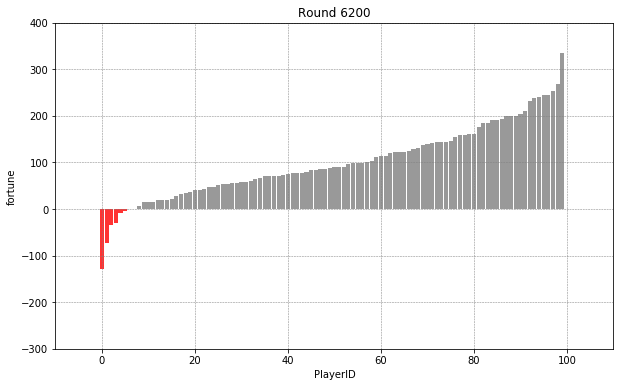

In [58]:
# 玩家从18岁开始，在经过17年后未35岁，这个期间共进行游戏6200次左右。此刻查看财富情况，将财富值为负标记为 破产，通过图表研究
game2_round6200 = pd.DataFrame({
    'money': game2_result.iloc[6200].sort_values().reset_index()[6200],
    'id': game2_result.iloc[6200].sort_values().reset_index()['id'],
    'color': 'gray'
})
game2_round6200['color'][game2_round6200['money']<0] = 'red' # 当所拥有的钱为负数时，用红色表示
id_pc = game2_round6200['id'][game2_round6200['money']<0].tolist() # 吧财富为负数的 ，人员编号记录下来 并且 转换成一个list

#绘图
plt.figure(figsize=(10,6))
plt.bar(game2_round6200.index,game2_round6200['money'],color=game2_round6200['color'],alpha=0.8,width=0.9)
plt.ylim([-300,400])
plt.xlim([-10,110])
plt.title('Round 6200')
plt.xlabel('PlayerID')
plt.ylabel('fortune')
plt.grid(color='gray',linestyle='--',linewidth=0.5)

成功绘制第6200轮结果柱状图
成功绘制第6700轮结果柱状图
成功绘制第7200轮结果柱状图
成功绘制第7700轮结果柱状图
成功绘制第8200轮结果柱状图
成功绘制第8700轮结果柱状图
成功绘制第9200轮结果柱状图
成功绘制第9700轮结果柱状图
成功绘制第10200轮结果柱状图
成功绘制第10700轮结果柱状图
成功绘制第11200轮结果柱状图
成功绘制第11700轮结果柱状图
成功绘制第12200轮结果柱状图
成功绘制第12700轮结果柱状图
成功绘制第13200轮结果柱状图
成功绘制第13700轮结果柱状图
成功绘制第14200轮结果柱状图
成功绘制第14700轮结果柱状图
成功绘制第15200轮结果柱状图
成功绘制第15700轮结果柱状图
成功绘制第16200轮结果柱状图
成功绘制第16700轮结果柱状图


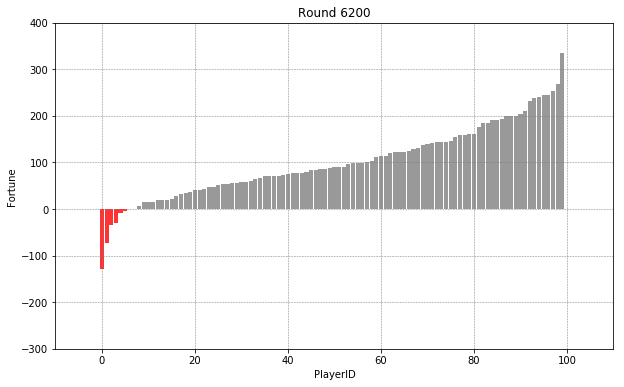

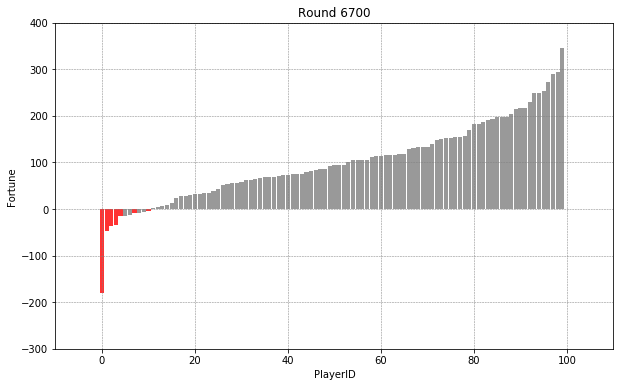

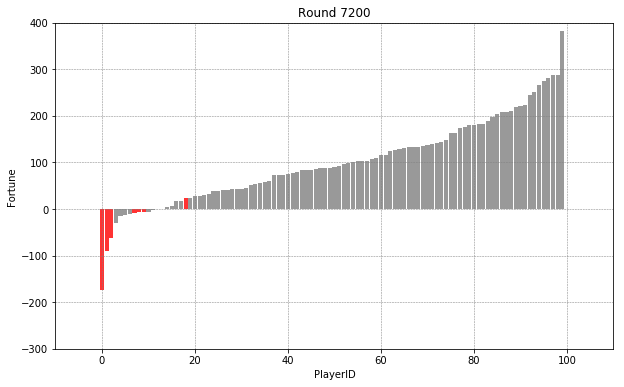

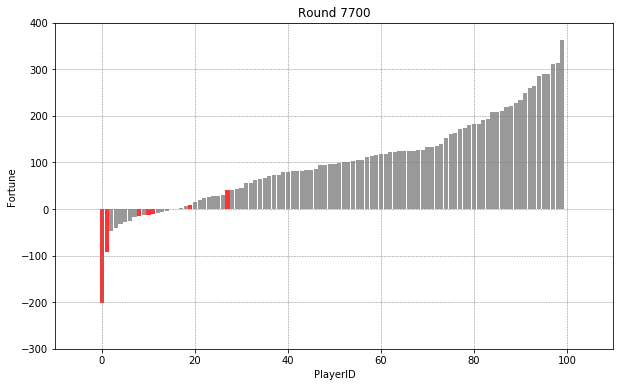

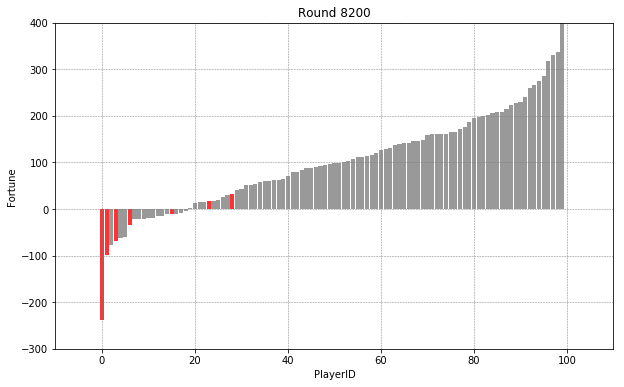

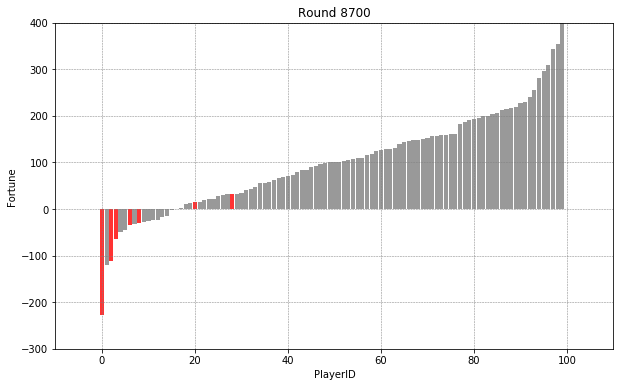

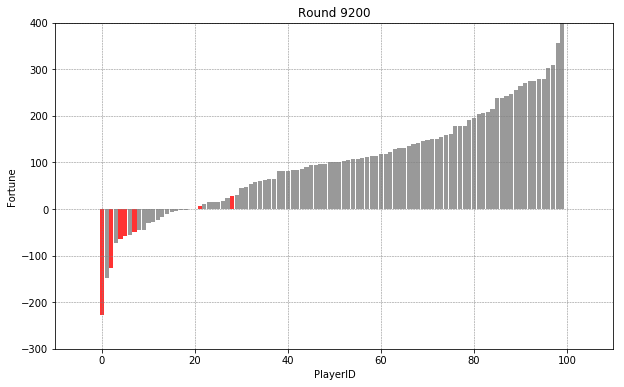

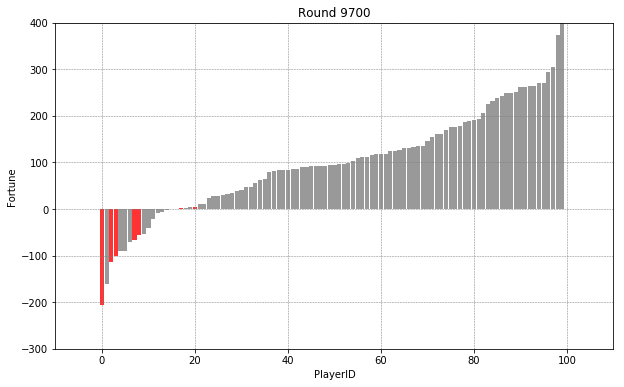

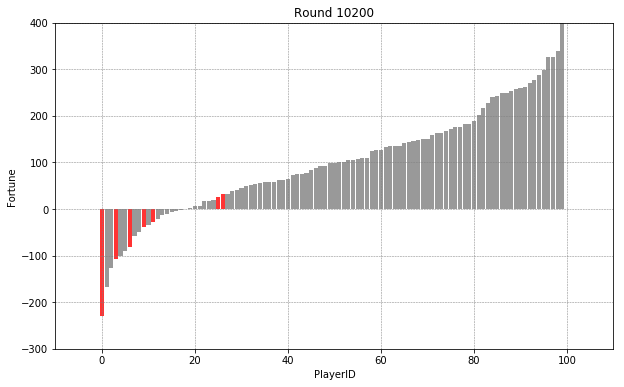

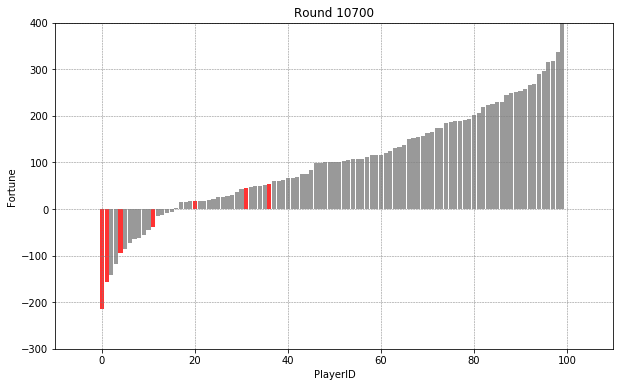

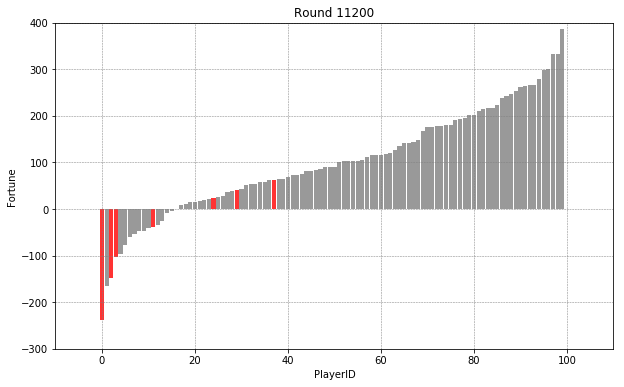

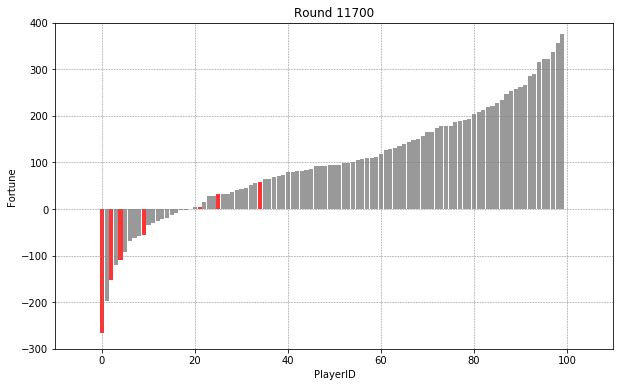

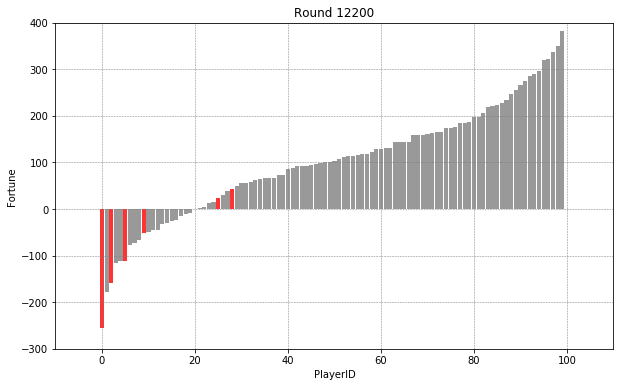

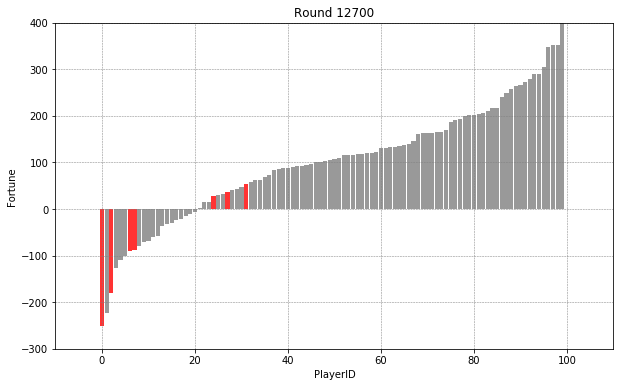

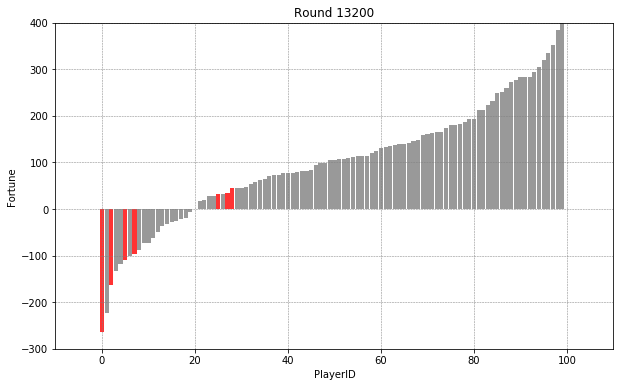

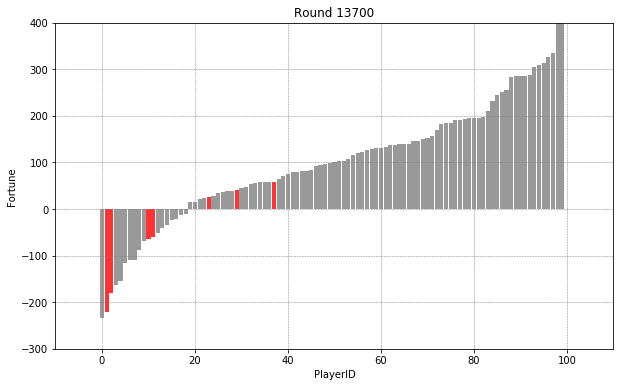

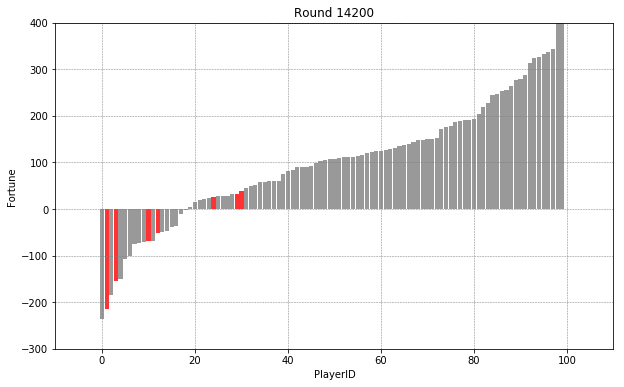

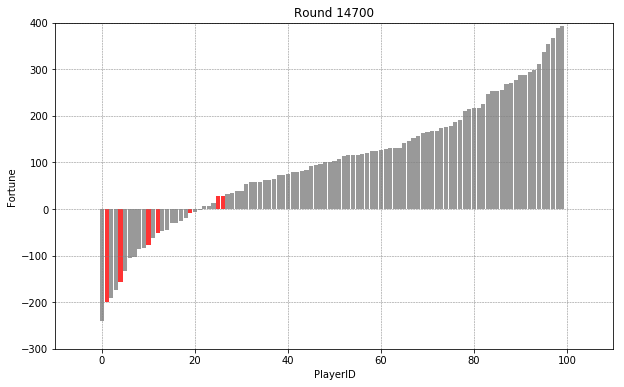

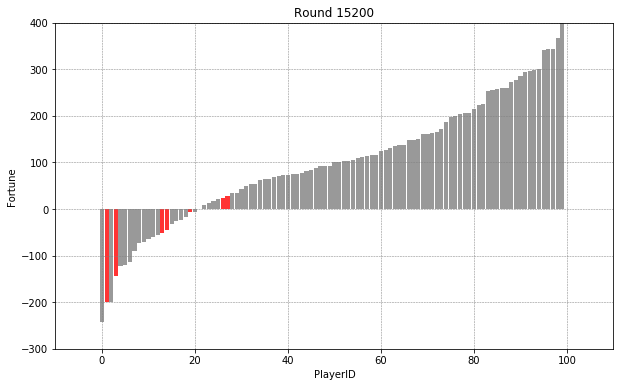

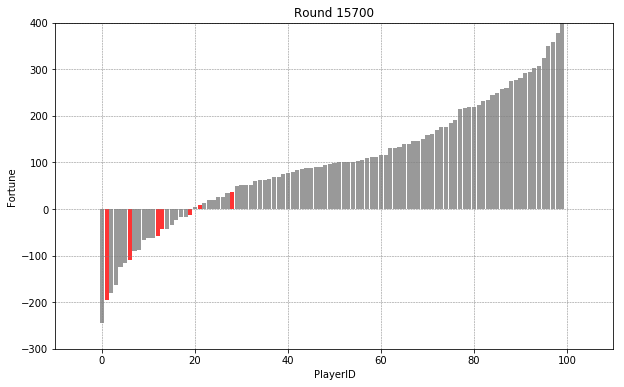

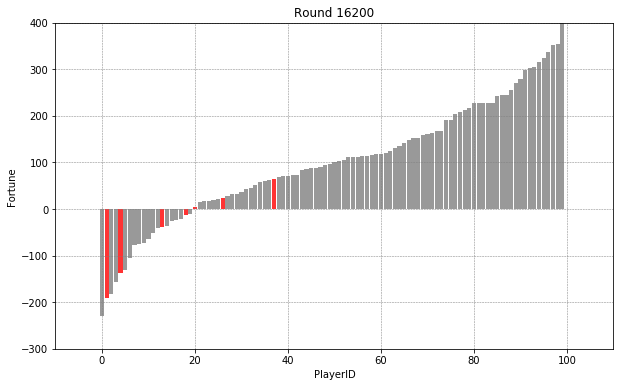

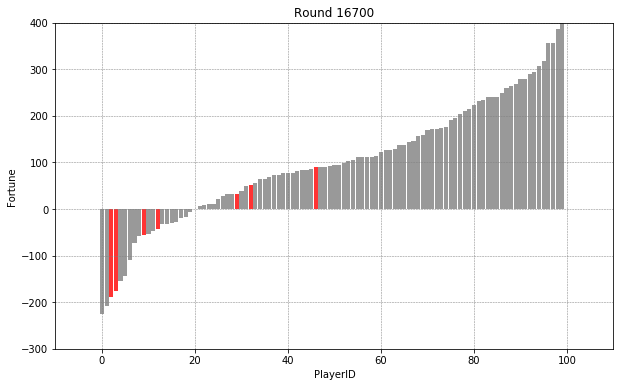

In [59]:
# 图谱分析6200以后，逆袭与否
os.chdir(r'F:\社会财富分配图\ND3')

def graph4(data,start,end,length):
    for n in list(range(start,end,length)):
        datai = pd.DataFrame({'money':data.iloc[n],'color':'gray'})
        datai['color'].loc[id_pc] = 'red'
        datai = datai.sort_values(by = 'money').reset_index()
        plt.figure(figsize=(10,6))
        plt.bar(datai.index,datai['money'],color=datai['color'],alpha=0.8,width=0.9)
        plt.ylim([-300,400])
        plt.xlim([-10,110])
        plt.title('Round %d' %n)
        plt.xlabel('PlayerID')
        plt.ylabel('Fortune')
        plt.grid(color='gray',linestyle='--',linewidth=0.5)
        plt.savefig('graph2_round_%d.png' % n,dpi=200)
        print('成功绘制第%d轮结果柱状图' %n)

graph4(game2_result,6200,17000,500)

In [ ]:
'''
3.努力的人生会更好吗？
   * 模型假设：
        -- 每个人的初始金额为 100 元
        -- 一共玩17000轮
        -- 每天拿出一元钱，并且随机分配给另一个人
        -- 有10个人的努力加倍，从而获得1%的竞争优势
        -- 允许借贷(可以向 亲戚朋友、银行、投资人借贷，资产为负时仍然可以参与游戏)
    * 要求：
        -- 构建模型模拟，再次模拟财富分配情况
        -- 努力的人最后，是否能变得富有
        -- 绘制柱状图，查看该轮财富情况
            ** 横轴标签代表玩家编号，柱子的高低变动反映该玩家财富值的变化
            ** 这里只需要每轮按照财富值排序绘制
            ** 前100轮，按照每10轮绘制一次柱状图，查看财富变化情况
            ** 钱100 —— 1000轮，按照100轮一次绘制一次柱状图，查看财富变化情况
            ** 1000 —— 17000轮，按照每400轮绘制一次柱状图，查看财富变化情况
    * 提示：
        -- 这里设置的10个人ID分别是：[1,11,21,31,41,51,61,71,81,91]
        -- np.random.choice(person_n,p=[...]) 这里通过设置p来修改概率，努力的人概率为0.0101，其余人概率为(0.899/90)

'''

In [ ]:
# 函数模型构建
person_p = [0.899/90 for i in range(100)]
for i in [1,11,21,31,41,51,61,71,81,91]:
    person_p[i-1] = 0.0101
    
def game3(data,roundi):
    round_i = pd.DataFrame({'pre_round':data[roundi - 1],'lost':1})
    choice_i = pd.Series(np.random.choice(person_n,100,p=person_p))
    gain_i = pd.DataFrame({'gain':choice_i.value_counts()})
    round_i = round_i.join(gain_i)
    round_i.fillna(0,inplace=True)
    return round_i['pre_round'] - round_i['lost'] + round_i['gain']

# 设置基本参数
person_n = [x for x in range(1,101)]  # 设置人员编号
fortune = pd.DataFrame([100 for i in range(100)],index = person_n) # 为每个人员设置初始财富 均为100元
fortune.index.name = 'id'

# 运行模型 并记录 运行时间
starttime = time.time()
for roundi in range(1,17001):
    fortune[roundi] = game3(fortune,roundi)
    print('已经完成%i轮' % roundi)
game3_result = fortune.T
endtime = time.time()
print('模型总共用时%.3f秒'% (endtime - starttime))